## Questions
* How to choose lag parameter for autoreg? 
* How to choose number of future days to predict for? 

In [55]:
import pandas as pd

# Load dataset
df = pd.read_csv("./datasets/bike_data.csv", index_col=0)

## Train/Test Split

The train test split for time series models is probably different than how we will split for the regression models. In this case. 


In [56]:
X = df.drop("Count",axis=1)
y = df["Count"]

# Split datset without shuffling
# First 70 % of data is train
# Next 30 % of data is test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [57]:
# AR example: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
from statsmodels.tsa.ar_model import AutoReg
from random import random

# fit model
data = y_train

model = AutoReg(data, lags=168)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data) + 24)

/Users/rekhathomas/opt/miniconda3/envs/ML/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [58]:
# See the r squared values on training data
from sklearn.metrics import r2_score
r2_score(y_train[168:], model_fit.predict()[168:])

0.9387789231474055

In [59]:
# First week of testing data
from sklearn.metrics import r2_score

N = 168 # Number of days in test to predict 168 is 1 week
y_pred = model_fit.predict(len(data), len(data) + N -1)

r2_score(y_test[:N], y_pred)

0.7228073873961492

## Visualize prediction for one week out 

* For the website maybe we could show how the model would change its predictions each day to adjust to the next 7 days? 

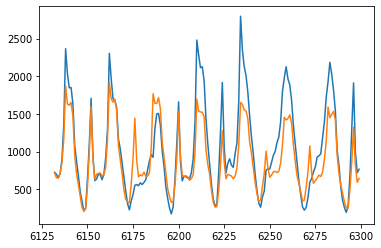

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(y_test[:N])
plt.plot(y_pred)
plt.show()

## Vector Autoregression

In [24]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
import numpy as np

# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)

# fit model
model = VAR((X_train * 1).values)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=168)
print(yhat)

[[ 1.15111527e+01  3.17880536e+01  5.84266668e+01 ... -2.37049982e-04
   1.00005853e+00  1.78520933e-04]
 [ 1.19764015e+01  3.18374358e+01  5.89082786e+01 ... -4.66011865e-04
   1.00012151e+00  3.44496955e-04]
 [ 1.23699461e+01  3.18533529e+01  5.94334085e+01 ... -6.80344274e-04
   1.00019358e+00  4.86761075e-04]
 ...
 [ 1.15292824e+01  2.73353657e+01  6.58012149e+01 ...  2.07334244e-03
   1.01594153e+00 -1.80148711e-02]
 [ 1.15291169e+01  2.73340381e+01  6.58007578e+01 ...  2.07005907e-03
   1.01594271e+00 -1.80127673e-02]
 [ 1.15289405e+01  2.73326886e+01  6.58005063e+01 ...  2.06750874e-03
   1.01594388e+00 -1.80113920e-02]]


In [28]:
df

,Count,Hour,Temp,Hum,Wind,Visb,Rainfall,Snow,Weekend,Holiday,...,DWeek_Monday,DWeek_Saturday,DWeek_Sunday,DWeek_Thursday,DWeek_Tuesday,DWeek_Wedesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
1,204,1,-5.5,38,0.8,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,173,2,-6.0,39,1.0,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,107,3,-6.2,40,0.9,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
4,78,4,-6.0,36,2.3,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
8756,764,20,3.4,37,2.3,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
8757,694,21,2.6,39,0.3,1968,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
8758,712,22,2.1,41,1.0,1859,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False


In [25]:
yhat[:][]

array([ 1.15111527e+01,  3.17880536e+01,  5.84266668e+01,  1.25532914e+00,
        1.56181604e+03,  1.03379068e-01,  2.34474423e-03,  1.05895752e-04,
        1.98447060e-03,  1.00042725e+00,  3.51335492e-04,  9.58774064e-01,
       -1.01421928e-04,  2.07317680e-04, -2.40972892e-04,  4.15924875e-02,
       -5.82810086e-04,  0.00000000e+00, -2.37049982e-04,  1.00005853e+00,
        1.78520933e-04])

# In Progress:

In [67]:
# Trying out the select_order to determine the best lag values
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(y_train, maxlag=200)
mod.ar_lags

/Users/rekhathomas/opt/miniconda3/envs/ML/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/Users/rekhathomas/opt/miniconda3/envs/ML/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171])